In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

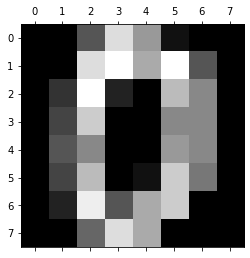

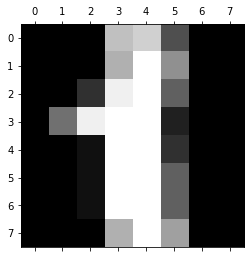

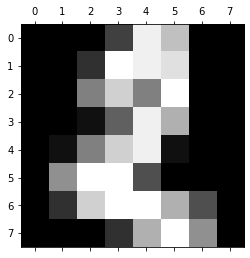

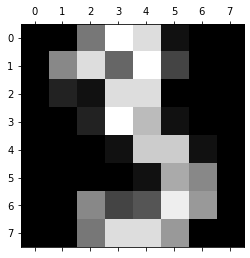

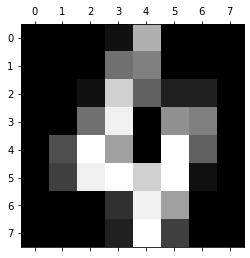

In [6]:
%matplotlib inline
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
digits.data[i]

array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
        0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
        7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
        0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
       15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.])

In [10]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(df['target'],axis='columns'),digits.target,test_size=0.2)

In [17]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
model.score(X_test,y_test)

0.9944444444444445

In [26]:
y_predicted=model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

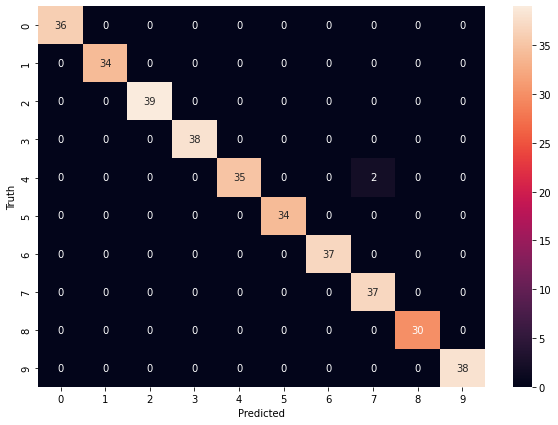

In [29]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')